# EDA: Early stage diabetes risk prediction dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [67]:
data_raw = pd.read_csv('data/diabetes_data.csv')

In [68]:
data = data_raw.copy()
print(data.shape)
data.head()

(520, 17)


,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [69]:
data.columns

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class'],
      dtype='object')

### Normalize column names

In [70]:
data.columns = data.columns.str.lower()
data.columns = data.columns.str.replace(' ', '_', regex=True)

In [71]:
data.columns

Index(['age', 'gender', 'polyuria', 'polydipsia', 'sudden_weight_loss',
       'weakness', 'polyphagia', 'genital_thrush', 'visual_blurring',
       'itching', 'irritability', 'delayed_healing', 'partial_paresis',
       'muscle_stiffness', 'alopecia', 'obesity', 'class'],
      dtype='object')

### Check for missing values

In [72]:
data.isnull().sum()

age                   0
gender                0
polyuria              0
polydipsia            0
sudden_weight_loss    0
weakness              0
polyphagia            0
genital_thrush        0
visual_blurring       0
itching               0
irritability          0
delayed_healing       0
partial_paresis       0
muscle_stiffness      0
alopecia              0
obesity               0
class                 0
dtype: int64

### Check for duplicate values

In [114]:
# There are identical rows but it is impossible to tell
# whether these are duplicates or not
has_dups = data.duplicated()
print('Has duplicates:', has_dups.any())
print('Duplicates:', has_dups.sum())

Has duplicates: True
Duplicates: 269


### Show sample duplicate records

In [75]:
dups_df = data[has_dups]
dups_df.sort_values(by=['age', 'gender']).head()

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
277,27,Male,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Negative
286,27,Male,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Negative
374,27,Male,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Negative
465,27,Male,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Negative
474,27,Male,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Negative


### Inspect distributions of features

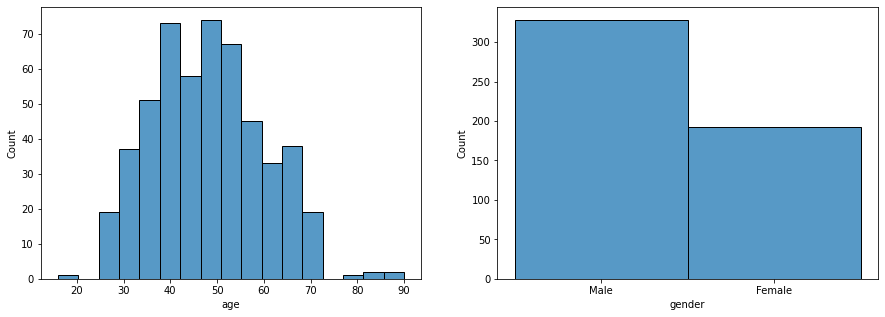

In [93]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
sns.histplot(data.age, ax=ax1)
sns.histplot(data.gender, ax=ax2)
plt.show()

### Inspect age attribute polarities

In [97]:
# Young patient with diabetes
data[data.age < 21]

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
133,16,Male,Yes,No,Yes,No,Yes,No,No,No,No,No,No,No,No,No,Positive


In [166]:
# Old patients with diabetes
data[data.age > 75]

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
101,85,Male,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,Positive
102,90,Female,No,Yes,Yes,No,No,Yes,Yes,Yes,No,No,No,Yes,Yes,No,Positive
113,79,Male,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,No,Yes,No,No,No,Positive
185,85,Male,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,Positive
186,90,Female,No,Yes,Yes,No,No,Yes,Yes,Yes,No,No,No,Yes,Yes,No,Positive


In [101]:
data.age.agg(['min', 'max', 'mean', 'median'])

min       16.000000
max       90.000000
mean      48.028846
median    47.500000
Name: age, dtype: float64

### Inspect attribute counts

In [121]:
data.columns.drop('age')

Index(['gender', 'polyuria', 'polydipsia', 'sudden_weight_loss', 'weakness',
       'polyphagia', 'genital_thrush', 'visual_blurring', 'itching',
       'irritability', 'delayed_healing', 'partial_paresis',
       'muscle_stiffness', 'alopecia', 'obesity', 'class'],
      dtype='object')

In [122]:
for attr in data.columns.drop('age'):
    print(data[attr].value_counts(), '\n')

Male      328
Female    192
Name: gender, dtype: int64 

No     262
Yes    258
Name: polyuria, dtype: int64 

No     287
Yes    233
Name: polydipsia, dtype: int64 

No     303
Yes    217
Name: sudden_weight_loss, dtype: int64 

Yes    305
No     215
Name: weakness, dtype: int64 

No     283
Yes    237
Name: polyphagia, dtype: int64 

No     404
Yes    116
Name: genital_thrush, dtype: int64 

No     287
Yes    233
Name: visual_blurring, dtype: int64 

No     267
Yes    253
Name: itching, dtype: int64 

No     394
Yes    126
Name: irritability, dtype: int64 

No     281
Yes    239
Name: delayed_healing, dtype: int64 

No     296
Yes    224
Name: partial_paresis, dtype: int64 

No     325
Yes    195
Name: muscle_stiffness, dtype: int64 

No     341
Yes    179
Name: alopecia, dtype: int64 

No     432
Yes     88
Name: obesity, dtype: int64 

Positive    320
Negative    200
Name: class, dtype: int64 



### Inspect outcomes

In [105]:
data['class'].value_counts()

Positive    320
Negative    200
Name: class, dtype: int64

### Inspecting relationships between attributes

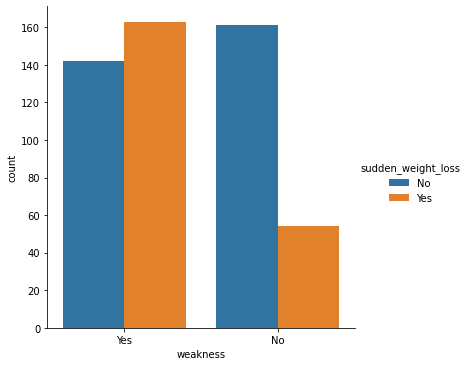

In [131]:
# Are weakness and sudden_weight_loss corelated?
sns.catplot(x='weakness', hue='sudden_weight_loss', kind='count', data=data);

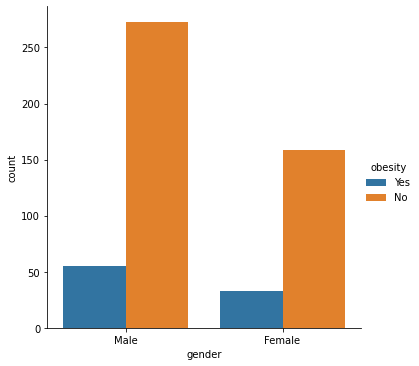

In [132]:
# How are gender and obesity related?
sns.catplot(x='gender', hue='obesity', kind='count', data=data);

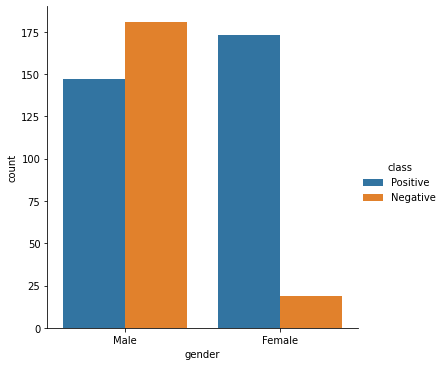

In [133]:
# How is gender related to outcomes?
sns.catplot(x='gender', hue='class', kind='count', data=data);

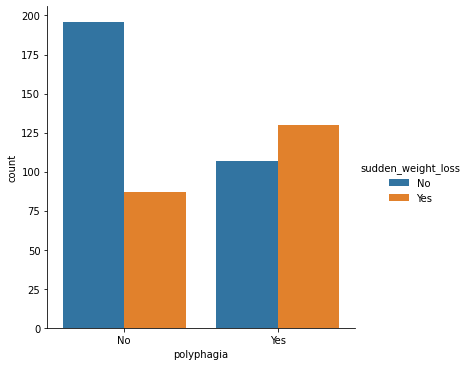

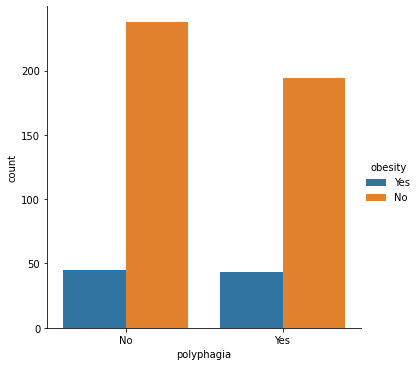

In [138]:
# Polyphagia, also known as hyperphagia, is the medical term for excessive or extreme hunger.
# Polyphagia in relation to sudden_weight_loss and obesity
sns.catplot(x='polyphagia', hue='sudden_weight_loss', kind='count', data=data)
sns.catplot(x='polyphagia', hue='obesity', kind='count', data=data);

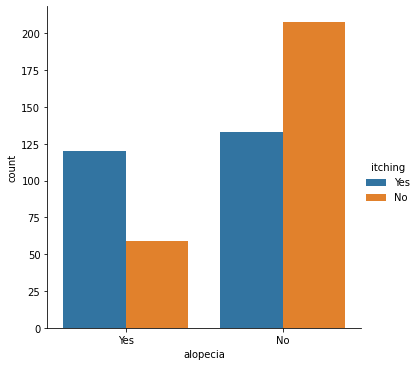

In [142]:
# How does alopecia and itching relate
sns.catplot(x='alopecia', hue='itching', kind='count', data=data);

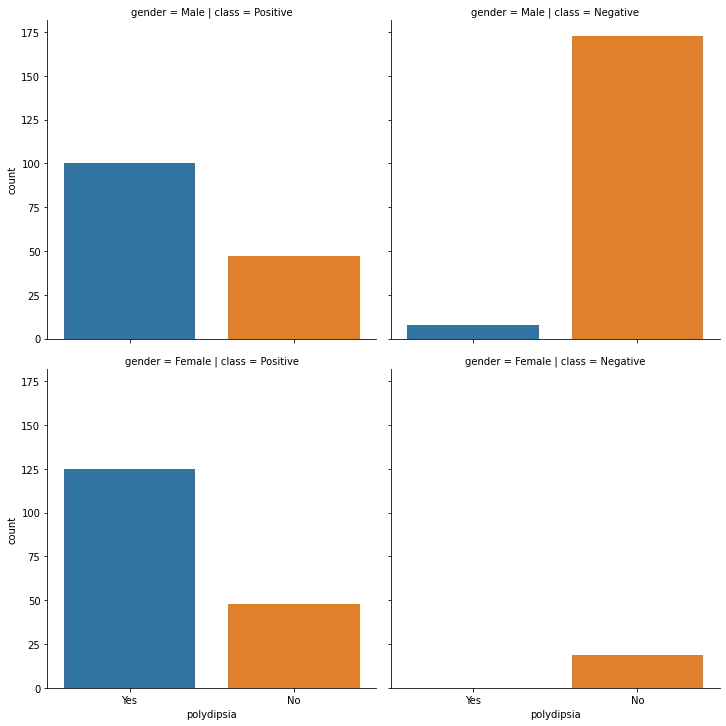

In [154]:
# Polydipsia is an abnormally great thirst as a symptom of disease (such as diabetes) or psychological disturbance.
sns.catplot(data=data, x='polydipsia', col='class', row='gender', kind='count');

## Transformations

In [193]:
X = pd.DataFrame()

X['age'] = data.age
X['is_male'] = data.gender.apply(lambda x: 1 if x == 'Male' else 0)

for attr in data.columns.drop(['age', 'gender', 'class']):
    X[attr] = data[attr].apply(lambda x: 1 if x == 'Yes' else 0)

In [194]:
print(X.shape)
X.head()

(520, 16)


,age,is_male,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1


In [195]:
# Assign target variable
y = data['class'].apply(lambda x: 1 if x == 'Positive' else 0).rename('is_diabetic')
print(y.shape)
print(y.value_counts())

(520,)
1    320
0    200
Name: is_diabetic, dtype: int64


### Save transformed data to CSVs

In [196]:
X.to_csv('matrices/diabetes/diabetes_X.csv')
y.to_csv('matrices/diabetes/diabetes_y.csv')

## Correlations

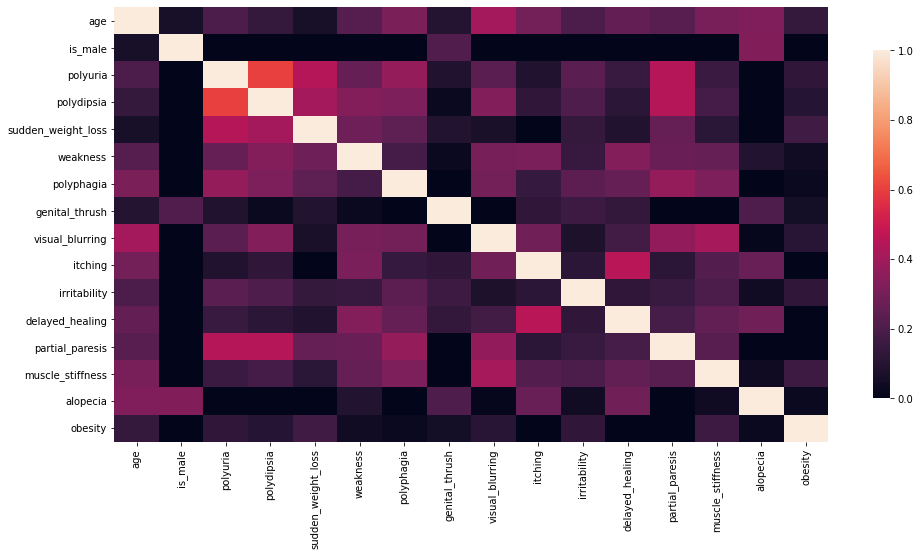

In [215]:
# Feature correlation
corr = X.corr()
# Heatmap
fig, ax = plt.subplots(figsize=(16, 8))
sns.heatmap(corr, vmin=0, vmax=1, cbar_kws={"shrink": .8});